### Sudharsan S - Datahack IITG


In [2]:
#Importing necessary libraries

import pandas as pd
import missingno as msno
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

# Load your dataset
dataset = pd.read_csv('training_set_features.csv')

# Checking the percentage of missing values in each column
missing_values_percentage = dataset.isnull().mean() * 100

# Displaying columns with missing values and their percentage of missing data
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_xyz_sick_from_vacc      1.479013
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
xyz_knowledge                   0.434343
xyz_concern     

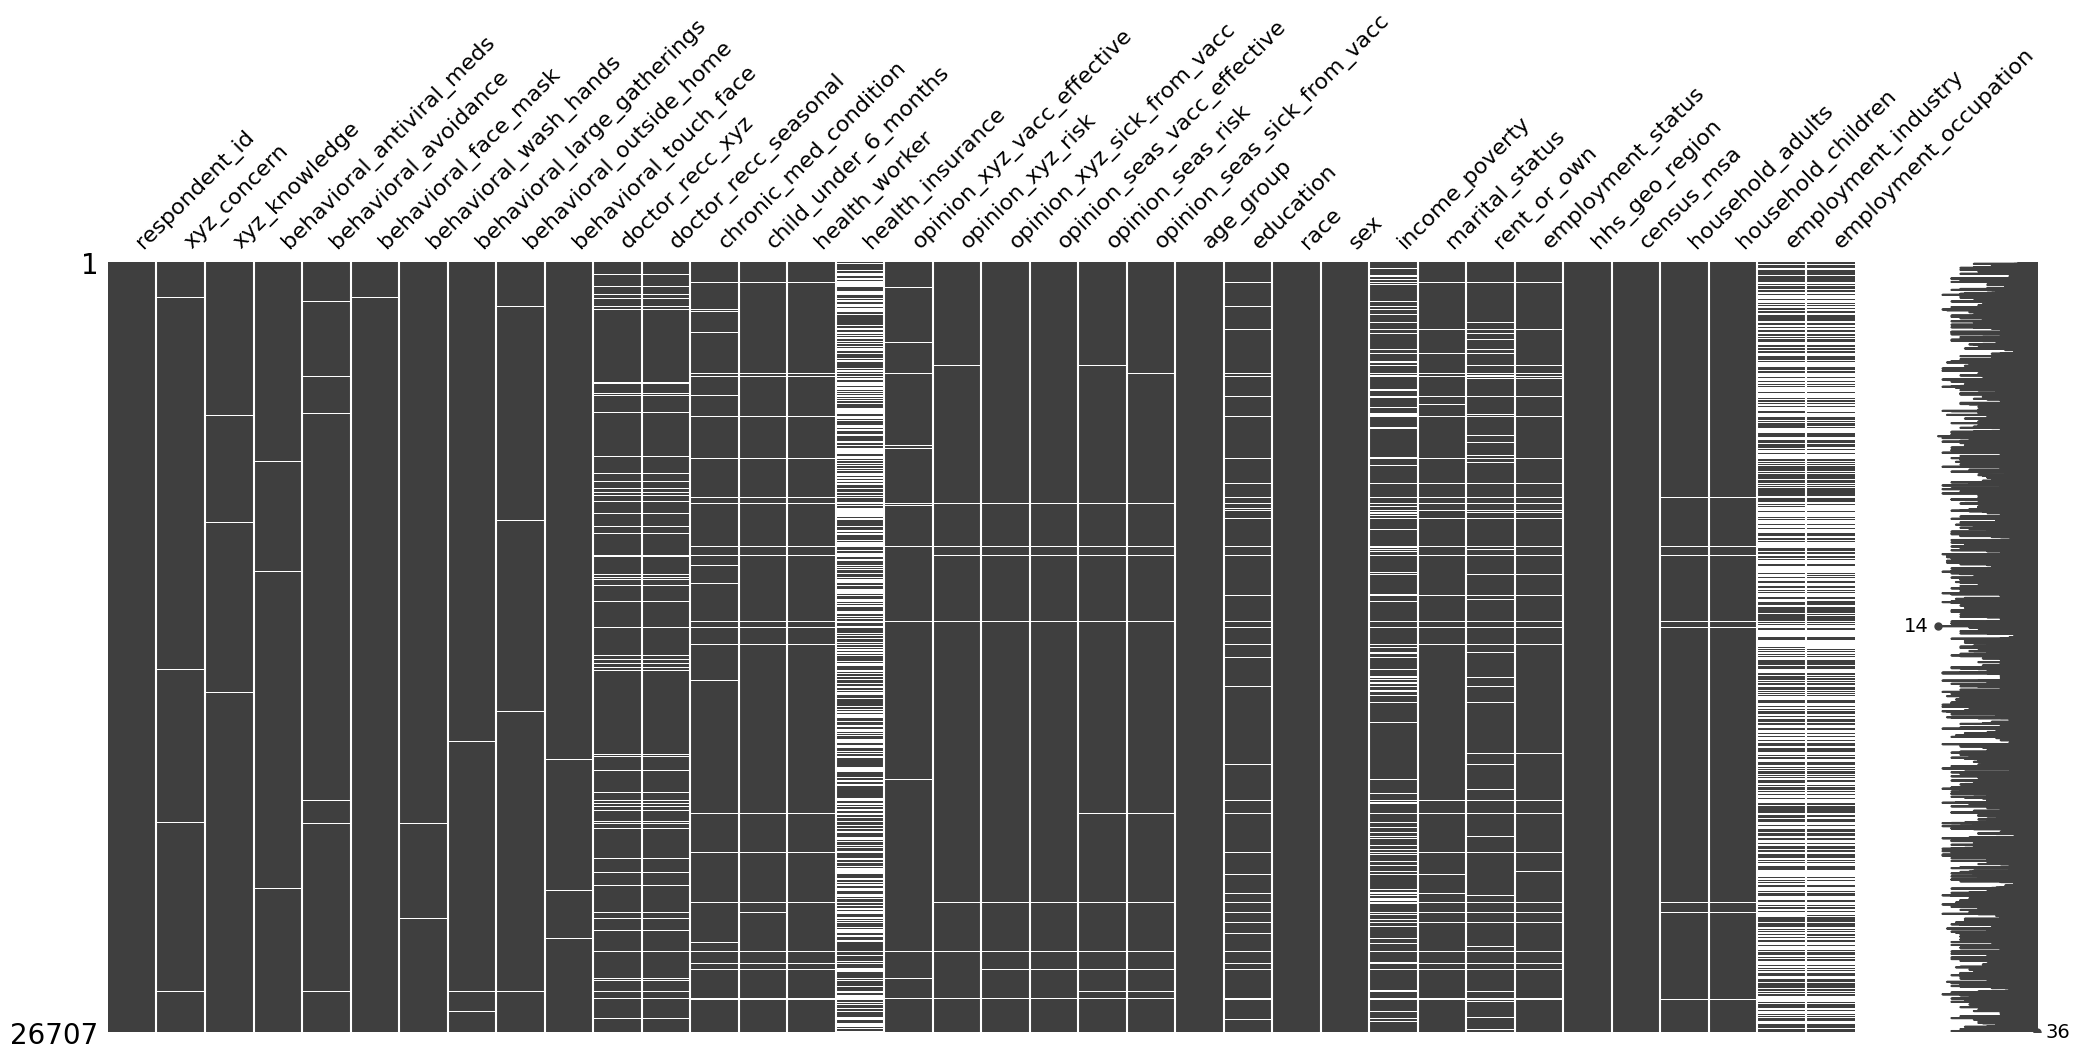

In [4]:
# Visualize missing values as a matrix
msno.matrix(dataset);

In [5]:
# Dropping columns with more than 40% missing values
columns_to_drop = ['employment_occupation', 'employment_industry', 'health_insurance']
dataset_cleaned = dataset.drop(columns=columns_to_drop)
dataset


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [6]:
# Filling missing values for columns with moderate missing values with mode (categorical) or median (numerical)
columns_to_impute_moderate = [
    'income_poverty', 'doctor_recc_xyz', 'doctor_recc_seasonal', 'rent_or_own',
    'employment_status', 'marital_status', 'education', 'chronic_med_condition',
    'child_under_6_months', 'health_worker'
]

for column in columns_to_impute_moderate:
    if dataset_cleaned[column].dtype == 'object':
        dataset_cleaned[column].fillna(dataset_cleaned[column].mode()[0], inplace=True)
    else:
        dataset_cleaned[column].fillna(dataset_cleaned[column].median(), inplace=True)

# Filling missing values for columns with low missing values with mean (numerical) or mode (categorical)
columns_to_impute_low = missing_values_percentage[(missing_values_percentage < 5) & (missing_values_percentage > 0)].index.tolist()

for column in columns_to_impute_low:
    if dataset_cleaned[column].dtype == 'object':
        dataset_cleaned[column].fillna(dataset_cleaned[column].mode()[0], inplace=True)
    else:
        dataset_cleaned[column].fillna(dataset_cleaned[column].mean(), inplace=True)

# Verify that all missing values have been handled
print(dataset_cleaned.isnull().sum().sum())

0


C:\Users\dilli\AppData\Local\Temp\ipykernel_18276\3669272073.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_cleaned[column].fillna(dataset_cleaned[column].mode()[0], inplace=True)
C:\Users\dilli\AppData\Local\Temp\ipykernel_18276\3669272073.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [7]:
print(dataset_cleaned.head())

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

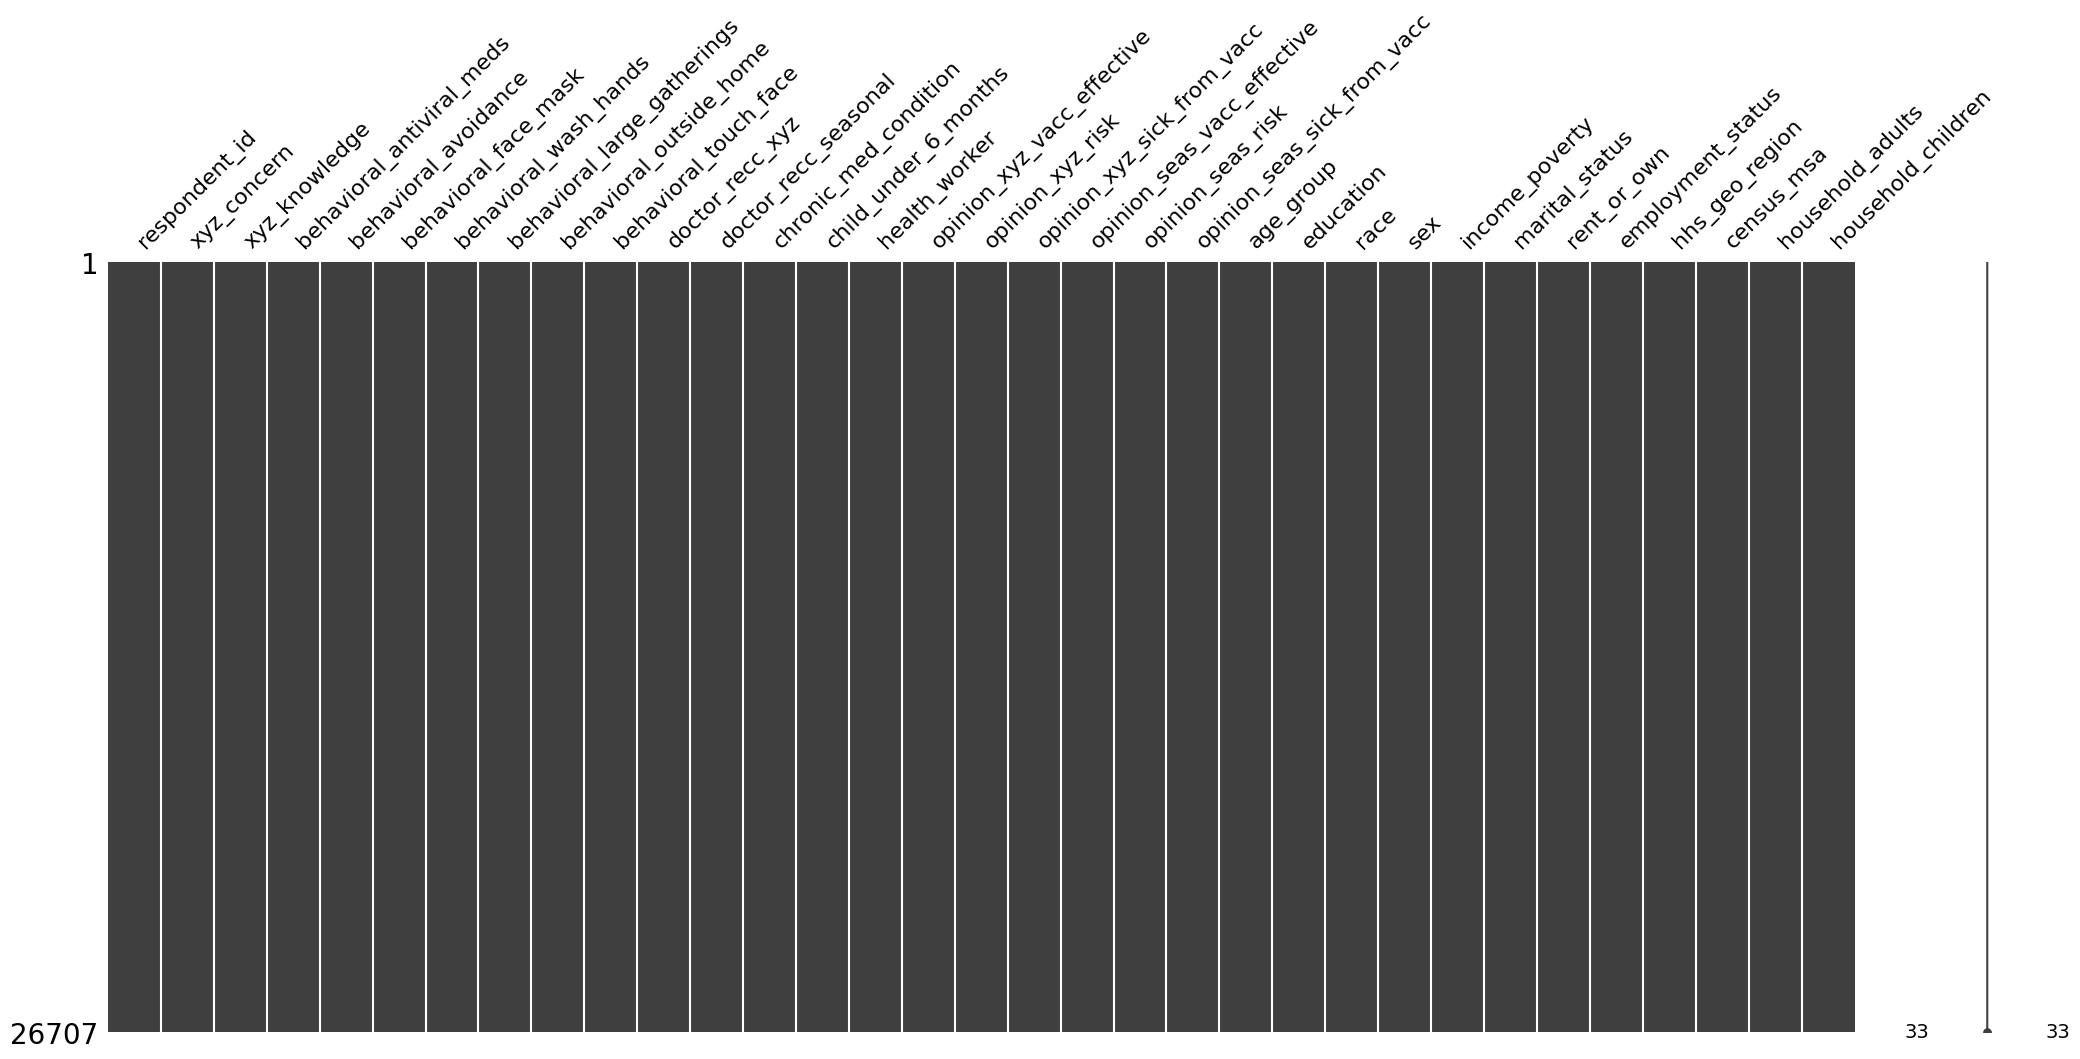

In [8]:
# Visualize cleaned dataset values as a matrix
msno.matrix(dataset_cleaned);

In [8]:
# # Save cleaned dataset file
# dataset_cleaned.to_csv('train_features_cleaned.csv', index=False)

In [10]:

# Load the training dataset labels
train_labels = 'training_set_labels.csv'
train_labels = pd.read_csv(train_labels)


In [11]:
train_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [12]:
print(dataset_cleaned.dtypes)

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [13]:

# Separate features and target variables in training data
features = dataset_cleaned.drop(columns=['respondent_id'])
target = train_labels[['xyz_vaccine', 'seasonal_vaccine']]

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns
numerical_cols = features.select_dtypes(exclude=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(features[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical features with numerical features
features_encoded = pd.concat([features[numerical_cols].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Standardize numerical features
scaler = StandardScaler()
features_encoded[numerical_cols] = scaler.fit_transform(features_encoded[numerical_cols])

In [14]:
print(features_encoded.head())

   xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0    -0.680609      -2.046928                  -0.226911   
1     1.520279       1.195647                  -0.226911   
2    -0.680609      -0.425641                  -0.226911   
3    -0.680609      -0.425641                  -0.226911   
4     0.419835      -0.425641                  -0.226911   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0             -1.632555             -0.272298              -2.177583   
1              0.617345             -0.272298               0.459948   
2              0.617345             -0.272298              -2.177583   
3              0.617345             -0.272298               0.459948   
4              0.617345             -0.272298               0.459948   

   behavioral_large_gatherings  behavioral_outside_home  \
0                    -0.749009                 1.403796   
1                    -0.749009                 1.403796   
2                    -0.74900

In [15]:
# Load the pre-processed test dataset features
test_file_path = 'test_set_features_cleaned.csv'
test_data = pd.read_csv(test_file_path)

In [16]:
# Apply same transformations to test data

test_encoded_categorical = encoder.transform(test_data[categorical_cols])
test_encoded_categorical_df = pd.DataFrame(test_encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
test_features_encoded = pd.concat([test_data[numerical_cols].reset_index(drop=True), test_encoded_categorical_df.reset_index(drop=True)], axis=1)
test_features_encoded[numerical_cols] = scaler.transform(test_features_encoded[numerical_cols])


In [17]:
test_features_encoded.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.419835,1.195647,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,-0.503893,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,-0.503893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.419835,1.195647,-0.226911,-1.632555,3.675062,0.459948,1.339461,1.403796,0.691971,-0.503893,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,1.984546,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.520279,-0.425641,4.418754,0.617345,-0.272298,0.459948,1.339461,1.403796,0.691971,-0.503893,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Train-test split for model evaluation
X_train, X_val, y_train, y_val = train_test_split(features_encoded, target, test_size=0.3, random_state=28)

In [19]:
models = {}
predictions = {}
for target_col in ['xyz_vaccine', 'seasonal_vaccine']:
    model = LogisticRegression()
    model.fit(X_train, y_train[target_col])
    y_val_pred = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val[target_col], y_val_pred)
    print(f'ROC AUC for {target_col}: {roc_auc}')
    models[target_col] = model
    predictions[target_col] = model.predict_proba(test_features_encoded)[:, 1]

ROC AUC for xyz_vaccine: 0.8253205930033551
ROC AUC for seasonal_vaccine: 0.8498670860473373


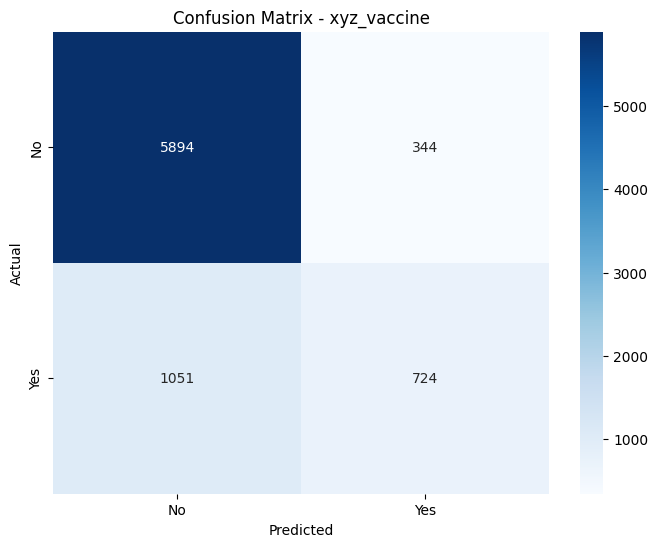

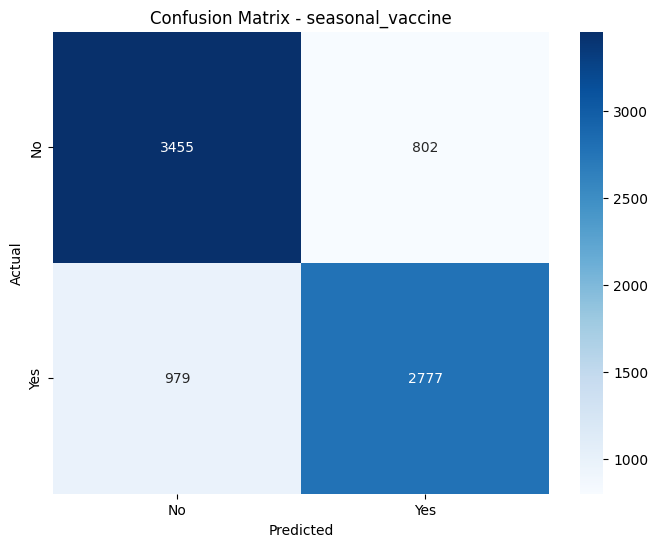

In [20]:

# Define a function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Plot confusion matrices for each target variable
for target_col in ['xyz_vaccine', 'seasonal_vaccine']:
    y_val_pred_prob = models[target_col].predict_proba(X_val)[:, 1]
    y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
    plot_confusion_matrix(y_val[target_col], y_val_pred, target_col)


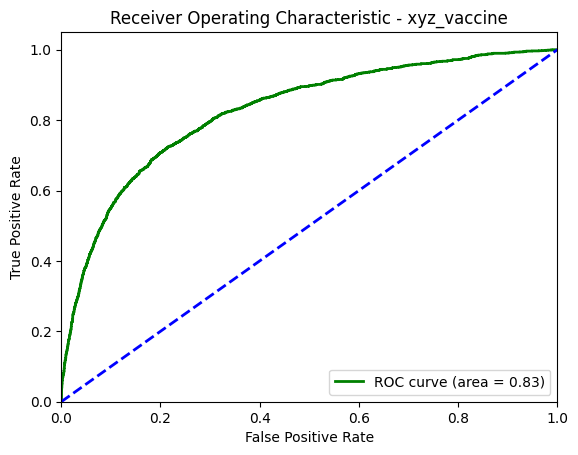

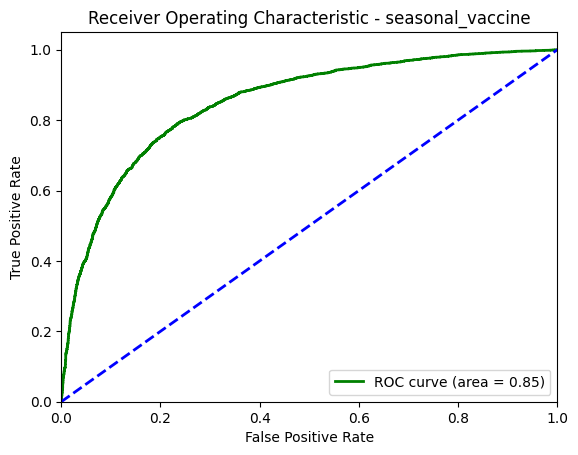

In [25]:
# Define a function to plot ROC curves
def plot_roc_curve(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each target variable
for target_col in ['xyz_vaccine', 'seasonal_vaccine']:
    y_val_pred = models[target_col].predict_proba(X_val)[:, 1]
    plot_roc_curve(y_val[target_col], y_val_pred, target_col)


In [ ]:
# Exporting submission
submission = test_data[['respondent_id']]
submission['xyz_vaccine'] = predictions['xyz_vaccine']
submission['seasonal_vaccine'] = predictions['seasonal_vaccine']

# Save submission file
submission.to_csv('submissionLogisticRegression(0.8498).csv', index=False)